In [8]:
h = 10
a = 7.9
b = 0.1
c = 6.4
d = 0.15

1/3*h*(a*b+c*d+0.5*(a*d+b*c))

#1/3*h*(a*b+c*d+math.sqrt(a*b*c*d) )


8.875

In [9]:
(a*b*h+c*d*h)/2

8.75

In [6]:
import math
math.sqrt(a*b*c*d) - 0.5*(a*d+b*c)

-0.04163835771691038

In [ ]:
import networkx as nx
import pandas as pd
import scipy.stats as stats

In [ ]:
input_path = "etf/agregirano_etf.net" 

G = nx.Graph(nx.read_pajek(input_path)) # nx.read_pajek će napraviti Multigraph, nama treba Graph

In [ ]:
akteri_labele = G.nodes()
print(akteri_labele)

['M. Dukić', 'G. Marković', 'Z. Petrović', 'Milan Janković', 'M. Erić', 'D. Paunović', 'M. Eric', 'Đ. Paunovic', 'M. Ponjavić', 'R. Đurić', 'S. Vukosavić', 'N. Popov', 'M. Terzić', 'D. Mihić', 'A. Rakić', 'S. Srdić', 'M. Nedeljković', 'Z. Radaković', 'Ž. Barbarić', 'G. Petrović', 'J. Cvetić', 'M. Ignjatović', 'М. Ignjatović', 'V. Drndarević', 'B. Kolundžija', 'M. Tasić', 'D. Olćan', 'D. Tošić', 'V. Petrović', 'A. Đorđević', 'S. Savić', 'M. Ilić', 'A. Krneta', 'M. Stevanović', 'M. Potrebić', 'B. Reljin', 'P. Pejović', 'M. Lutovac', 'I. Škokljev', 'Vesna Blagojević', 'P. Ivaniš', 'D. Drajić', 'S. Brkić', 'Dejan Drajić', 'L. Saranovac', 'S. Brkic', 'Vesna Blagojevic', 'D. Milićev', 'Z. Jovanović', 'Vladimir Blagojević', 'D. Bojić', 'M. Bojović', 'M. Cvetanović', 'J. Đorđević', 'Đ. Đurđević', 'B. Furlan', 'S. Gajin', 'V. Milutinović', 'B. Nikolić', 'J. Protić', 'M. Punt', 'Z. Radivojević', 'Ž. Stanisavljević', 'S. Stojanović', 'I. Tartalja', 'N. Kojić', 'K. Stanković', 'M. Vujisić', 'P. Os

In [ ]:
def calculate_centralities(G):

    DC_dict = nx.degree_centrality(G)
    CC_dict = nx.closeness_centrality(G)
    BC_dict = nx.betweenness_centrality(G)
    EVC_dict = nx.eigenvector_centrality(G)

    df1 = pd.DataFrame.from_dict(DC_dict, orient='index', columns=['DC'])
    df2 = pd.DataFrame.from_dict(CC_dict, orient='index', columns=['CC'])
    df3 = pd.DataFrame.from_dict(BC_dict, orient='index', columns=['BC'])
    df4 = pd.DataFrame.from_dict(EVC_dict, orient='index', columns=['EVC'])
    df = pd.concat([df1, df2, df3, df4], axis=1)
    return df



In [ ]:
df = calculate_centralities(G)
print(df)

                       DC        CC        BC           EVC
M. Dukić         0.026616  0.177750  0.021849  1.132813e-05
G. Marković      0.011407  0.167649  0.005662  1.101134e-05
Z. Petrović      0.022814  0.199453  0.028045  1.122618e-04
Milan Janković   0.015209  0.199654  0.023579  6.274895e-05
M. Erić          0.003802  0.147616  0.000000  6.648014e-07
D. Paunović      0.007605  0.164304  0.000000  7.193970e-06
M. Eric          0.003802  0.147616  0.000000  6.648014e-07
Đ. Paunovic      0.003802  0.147616  0.000000  6.648014e-07
M. Ponjavić      0.003802  0.133553  0.000000  2.210841e-07
R. Đurić         0.019011  0.157748  0.014809  3.818057e-06
S. Vukosavić     0.026616  0.169663  0.022921  5.117708e-05
N. Popov         0.015209  0.148727  0.006589  3.377127e-06
M. Terzić        0.019011  0.166379  0.009854  3.926128e-06
D. Mihić         0.011407  0.148615  0.000000  3.366351e-06
A. Rakić         0.011407  0.179852  0.026178  8.688878e-04
S. Srdić         0.011407  0.157622  0.0

### Korelacije

Korelacija - kako jedna metrika zavisi od druge, pozitivna korelacija znači da veća vrednost jedne od metrikka povlači veću vrednost druge metrike. Interesantno je posmatrati Kendalovu tau korelaciju (korelaciju po rangu, ne po numeričkoj vrednosti) između različitih mera centralnosti ove mreže. 

In [ ]:
labele = ['DC', 'CC', 'BC', 'EVC']
cross_correlation_matrix = pd.DataFrame(columns = ['DC', 'CC', 'BC', 'EVC'], index = ['DC', 'CC', 'BC', 'EVC'])
p_val_matrix = pd.DataFrame(columns = ['DC', 'CC', 'BC', 'EVC'], index = ['DC', 'CC', 'BC', 'EVC'])

In [ ]:
for ind in labele:
    for col in labele:
        cross_correlation_matrix[ind][col], p_val_matrix[ind][col] =  stats.kendalltau(df[ind], df[col])

In [ ]:
print(cross_correlation_matrix)

           DC        CC        BC       EVC
DC          1  0.591041   0.61925  0.496577
CC   0.591041         1  0.495483  0.658056
BC    0.61925  0.495483         1  0.322409
EVC  0.496577  0.658056  0.322409         1


In [ ]:
print(p_val_matrix)

              DC            CC           BC           EVC
DC   3.9429e-107   4.12816e-42  1.55478e-40    2.8845e-30
CC   4.12816e-42  4.78799e-128  6.32454e-29     1.357e-56
BC   1.55478e-40   6.32454e-29  1.35401e-98   3.66452e-13
EVC   2.8845e-30     1.357e-56  3.66452e-13  2.17018e-128


Na osnovu matrice korelacija vidimo da su mere centralnosti pozitivno korelisane, što je očekivano i važi za većinu socijalnih mreža. Najslabija je korelacija između EV centralnosti i relacione centralnosti. Ispitajmo detaljnije ovu korelaciju vizuelizacijom.

In [ ]:
df_ = df[['BC', 'EVC']]
print(df_)
df_['BC_rank'] = df['BC'].rank(ascending=False) 
df_['EVC_rank'] = df['EVC'].rank(ascending=False) 
df_p = df_.sort_values(['BC_rank'], ascending=True)
print(df_p)

                       BC           EVC
M. Dukić         0.021849  1.132813e-05
G. Marković      0.005662  1.101134e-05
Z. Petrović      0.028045  1.122618e-04
Milan Janković   0.023579  6.274895e-05
M. Erić          0.000000  6.648014e-07
D. Paunović      0.000000  7.193970e-06
M. Eric          0.000000  6.648014e-07
Đ. Paunovic      0.000000  6.648014e-07
M. Ponjavić      0.000000  2.210841e-07
R. Đurić         0.014809  3.818057e-06
S. Vukosavić     0.022921  5.117708e-05
N. Popov         0.006589  3.377127e-06
M. Terzić        0.009854  3.926128e-06
D. Mihić         0.000000  3.366351e-06
A. Rakić         0.026178  8.688878e-04
S. Srdić         0.000000  3.426761e-06
M. Nedeljković   0.000000  3.426761e-06
Z. Radaković     0.043434  4.733489e-06
Ž. Barbarić      0.000000  7.708200e-17
G. Petrović      0.000000  7.708200e-17
J. Cvetić        0.071914  5.102754e-06
M. Ignjatović    0.000000  5.211798e-07
М. Ignjatović    0.004856  4.021329e-06
V. Drndarević    0.019465  5.643071e-05


C:\Users\obradovic\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
import matplotlib.pyplot as plt

def plot_rank_correlation(x_rank, y_rank, x_label, y_label):                                                    

    plt.figure(1)   

    # prep axes   
    plt.xlabel(x_label)                                                                                                            
    plt.xscale('linear')                                                                                                                
    plt.xlim(1, max(x_rank))  

    plt.ylabel(y_label)                                                                                                          
    plt.yscale('linear')                                                                                                                
    plt.ylim(1, max(y_rank))                                                                                                             
                                                                                                                                                                                                    
    plt.scatter(x_rank, y_rank, marker='.')                                                                                                    
    plt.show()
    


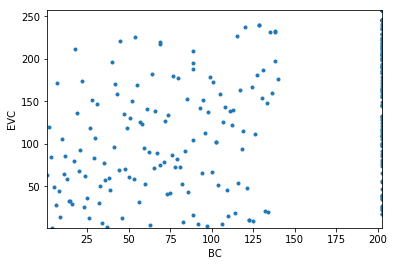

In [ ]:
plot_rank_correlation(df_['BC_rank'], df_['EVC_rank'], 'BC', 'EVC')

Verovatno nam rezultate narušavaju tačke sa malim rangom po BC metrici - to su čvorovi koji nisu ni na jednoj najkraćoj putanji između drugih čvorova. Takođe, verovatno je bolje posmatrati samo dominantnu povezanu komponentu (metrike su pravljene za mreže koje su jedna povezana komponenta).

### Ponovljene analize sa dominantnom komponentom

In [ ]:
Gd = nx.Graph(nx.read_pajek("etf/dominantna_komponenta.net"))

In [ ]:
df = calculate_centralities(Gd)
print(df)

                      DC        CC        BC           EVC
M. Dukić        0.030702  0.205036  0.029090  1.132813e-05
G. Marković     0.013158  0.193384  0.007539  1.101134e-05
Z. Petrović     0.026316  0.230071  0.037338  1.122618e-04
Milan Janković  0.017544  0.230303  0.031392  6.274895e-05
M. Erić         0.004386  0.170276  0.000000  6.648014e-07
D. Paunović     0.008772  0.189526  0.000000  7.193970e-06
M. Eric         0.004386  0.170276  0.000000  6.648014e-07
Đ. Paunovic     0.004386  0.170276  0.000000  6.648014e-07
M. Ponjavić     0.004386  0.154054  0.000000  2.210841e-07
R. Đurić        0.021930  0.181963  0.019716  3.818057e-06
S. Vukosavić    0.030702  0.195708  0.030516  5.117708e-05
N. Popov        0.017544  0.171558  0.008772  3.377127e-06
M. Terzić       0.021930  0.191919  0.013119  3.926128e-06
D. Mihić        0.013158  0.171429  0.000000  3.366351e-06
A. Rakić        0.013158  0.207461  0.034853  8.688878e-04
S. Srdić        0.013158  0.181818  0.000000  3.426761e-

In [ ]:
labele = ['DC', 'CC', 'BC', 'EVC']
cross_correlation_matrix = pd.DataFrame(columns = ['DC', 'CC', 'BC', 'EVC'], index = ['DC', 'CC', 'BC', 'EVC'])
p_val_matrix = pd.DataFrame(columns = ['DC', 'CC', 'BC', 'EVC'], index = ['DC', 'CC', 'BC', 'EVC'])

for ind in labele:
    for col in labele:
        cross_correlation_matrix[ind][col], p_val_matrix[ind][col] =  stats.kendalltau(df[ind], df[col])
        
print(cross_correlation_matrix)
print(p_val_matrix)

           DC        CC        BC       EVC
DC          1  0.541848  0.582265  0.416384
CC   0.541848         1  0.468226  0.547614
BC   0.582265  0.468226         1  0.245136
EVC  0.416384  0.547614  0.245136         1
              DC            CC           BC           EVC
DC   8.19599e-93   3.63306e-31  4.32012e-32   4.26566e-19
CC   3.63306e-31  8.56119e-112  2.70312e-23   7.60636e-35
BC   4.32012e-32   2.70312e-23   1.3837e-89   1.88817e-07
EVC  4.26566e-19   7.60636e-35  1.88817e-07  3.64472e-112


C:\Users\obradovic\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


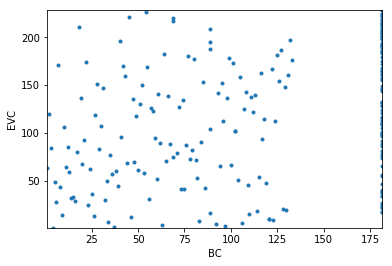

In [ ]:
df_ = df[['BC', 'EVC']]
df_['BC_rank'] = df['BC'].rank(ascending=False) 
df_['EVC_rank'] = df['EVC'].rank(ascending=False) 
df_p = df_.sort_values(['BC_rank'], ascending=True)

plot_rank_correlation(df_['BC_rank'], df_['EVC_rank'], 'BC', 'EVC')

### Kompozitni rang

Kako rangirati čvorove tako da u obzir uzmemo sve metrike? 

$ composite\_rank = DC\_rank * CC\_rank * BC\_rank * EVC\_rank $

In [ ]:
df_ = df
for metric in labele:
    df_[f"{metric}_rank"] = df[f"{metric}"].rank(ascending=False) 
    
df_['composite_rank'] = df_['DC_rank'] * df_['CC_rank'] * df_['BC_rank'] * df_['EVC_rank']

df_.sort_values(['composite_rank'], ascending = True)
df_.sort_values(['CC'], ascending = False, inplace=True)

In [ ]:
print(df_)

                             DC        CC        BC           EVC  DC_rank  \
V. Milutinović         0.091255  0.232265  0.094544  2.441752e-01      1.0   
J. Protić              0.083650  0.210723  0.030865  2.394546e-01      2.0   
B. Nikolić             0.079848  0.209828  0.015322  2.355182e-01      3.0   
J. Đorđević            0.076046  0.209605  0.006410  2.351616e-01      6.0   
Vladimir Blagojević    0.076046  0.227193  0.061953  2.294871e-01      6.0   
Z. Jovanović           0.076046  0.218648  0.024993  2.317005e-01      6.0   
A. Đorđević            0.076046  0.234470  0.087430  1.662599e-03      6.0   
Ž. Stanisavljević      0.076046  0.209605  0.004910  2.361866e-01      6.0   
S. Gajin               0.072243  0.223342  0.041599  2.295135e-01     10.5   
Đ. Đurđević            0.072243  0.218648  0.032322  2.327043e-01     10.5   
M. Cvetanović          0.072243  0.209383  0.007160  2.325735e-01     10.5   
M. Bojović             0.072243  0.209383  0.003133  2.336931e-0